In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GQLEQELAALDQQIAALKQRRAALKWQIQG', 'GQLEQELAALDQQIAALKQRRAALKWQIQG']

In [7]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 30),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['b'], 27),  
]

In [8]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 30, 5.0, 200, 102.8]


In [9]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [10]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [11]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	57   	-843.238	43.3465	-939.222	-770.078
1  	84   	-892.843	23.3785	-947.697	-842.238
2  	74   	-915.26 	16.6732	-947.697	-892.239
3  	56   	-927.472	12.7523	-948.673	-904.713
4  	74   	-937.787	5.68118	-950.885	-926.296
5  	84   	-942.322	3.76118	-952.412	-938.48 
6  	71   	-943.616	3.81238	-952.412	-939.236
7  	72   	-945.288	3.37148	-952.412	-939.712
8  	66   	-946.294	2.88343	-952.412	-941.262
9  	79   	-947.003	2.64075	-952.412	-942.473
10 	79   	-947.343	2.53051	-952.412	-942.818
11 	79   	-948.216	2.19343	-952.412	-943.376
12 	62   	-948.323	2.35151	-952.412	-943.376
13 	66   	-948.834	1.90803	-952.412	-945.834
14 	68   	-949.244	1.86151	-952.412	-946.521
15 	75   	-949.278	1.83816	-952.485	-946.754
16 	65   	-949.402	1.89449	-952.485	-946.754
17 	66   	-949.499	1.89006	-952.485	-946.485
18 	91   	-949.851	1.80152	-952.485	-946.888
19 	73   	-949.946	1.81426	-952.485	-946.979
20 	73   	-949.619	2.29272	-952.502	-939.757
21 	68   	

In [12]:
optimized_model_ga = opt_ga.best_model

In [13]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-952.5023636230629

In [14]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [15]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

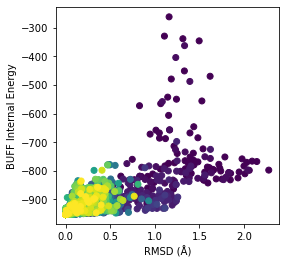

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [17]:
f = open('d_CC-Di_p-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [18]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [19]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min     	max     
0  	100  	-810.28	100.349	-919.429	-219.611
1  	100  	-841.863	47.5683	-919.429	-640.459
2  	100  	-869.75 	33.5713	-949.817	-764.653
3  	100  	-887.493	26.0456	-949.817	-812.402
4  	100  	-897.803	19.4185	-949.817	-849.682
5  	100  	-903.202	18.9043	-949.817	-849.682
6  	100  	-909.347	17.5969	-949.817	-866.712
7  	100  	-917.056	16.6265	-949.817	-887.811


In [ ]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

In [ ]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [ ]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [ ]:
f = open('d_CC-Di_p-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [ ]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

In [ ]:
opt_pso.run_opt(100, 30, cores=8)

In [ ]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

In [ ]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [ ]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [ ]:
f = open('d_CC-Di_p-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [ ]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

In [ ]:
opt_cmaes.run_opt(100, 30, cores=8)

In [ ]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

In [ ]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [ ]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [ ]:
f = open('d_CC-Di_p-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)